# Descriptive Statistics and Data Visualization
Soft Agar Assay
- https://www.jove.com/video/51998/the-soft-agar-colony-formation-assay

Data Pre-ocessing:
- `processSoftAgar.ijm`

Data analysis:
- this notebook. should be able to run from any folder?

## Imports

In [467]:
#standard imports
import numpy as np
import pandas as pd
import scipy

#import basic plotting functions
import matplotlib.pyplot as plt

#make plots visible in notebook (and later)
%matplotlib inline

#import plotting module for statistical data
import seaborn as sns

## Load Data

In [28]:
results=pd.read_csv("/Volumes/Amanda4TB/gartnerlab/1heterogeneityproject/soft agar/single cell soft agar test 1 start date 20170224 and 20170228 for at 9 and at9 crystal violet staining/quantification/20170224Results.csv")

In [29]:
results.head()

,,Label,X,Y,Slice
0,1,Untitled:at4-1,653,972,1
1,2,Untitled:at4-1,769,803,1
2,3,Untitled:at4-1,803,709,1
3,4,Untitled:at4-1,757,397,1
4,5,Untitled:at4-1,575,1043,1


## Descriptive Statistics
### The groupby() function
*super helpful function* the **groupby() function** groups data by a column, typically a classifier.

In [30]:
results_grouped=results.groupby('Label')

In [31]:
results_grouped #this is a 'groupby' object

In [33]:
results['X'].count()

4837

In [34]:
results_grouped['X'].count()

Label
Untitled:at22-1       80
Untitled:at22-2       73
Untitled:at22-3       64
Untitled:at4-1        18
Untitled:at4-2        18
Untitled:at4-3        15
Untitled:at7-1        70
Untitled:at7-2        90
Untitled:at7-3        52
Untitled:at8-1        24
Untitled:at8-2        45
Untitled:at8-3        15
Untitled:at9-1       369
Untitled:at9-2       357
Untitled:at9-3       277
Untitled:ca1a-1      214
Untitled:ca1a-2      290
Untitled:ca1a-3      195
Untitled:gfp-1       232
Untitled:gfp-2       261
Untitled:gfp-3       241
Untitled:r10mes-1    434
Untitled:r10mes-2    484
Untitled:r10mes-3    465
Untitled:r3ep-1       41
Untitled:r3ep-2       31
Untitled:r3ep-3       33
Untitled:rfp-1       112
Untitled:rfp-2       113
Untitled:rfp-3       124
Name: X, dtype: int64

In [35]:
counts=results_grouped.count()
counts.to_csv("/Volumes/Amanda4TB/gartnerlab/1heterogeneityproject/soft agar/single cell soft agar test 1 start date 20170224 and 20170228 for at 9 and at9 crystal violet staining/quantification/20170224Counts.csv")

#### curate labels, etc in excel then save as 'cur'

In [225]:
counts=pd.read_csv("/Volumes/Amanda4TB/gartnerlab/1heterogeneityproject/soft agar/single cell soft agar test 1 start date 20170224 and 20170228 for at 9 and at9 crystal violet staining/quantification/20170224CountsCur.csv")
counts

,Type,Phenotype,Label,Counts
0,Mix,Mix,Par-22,80
1,Mix,Mix,Par-22,73
2,Mix,Mix,Par-22,64
3,Ep,Ep,Ep-4,18
4,Ep,Ep,Ep-4,18
5,Ep,Ep,Ep-4,15
6,Mes,Mes,Mes-7,70
7,Mes,Mes,Mes-7,90
8,Mes,Mes,Mes-7,52
9,Ep,Ep,Ep-8,24


**The describe() function** contains most of the common descriptors

In [226]:
counts_each=counts.groupby(("Phenotype","Label"))
counts_each.describe()

Counts
Phenotype Label                   
Ep        Ep-4   count    3.000000
                 mean    17.000000
                 std      1.732051
                 min     15.000000
                 25%     16.500000
                 50%     18.000000
                 75%     18.000000
                 max     18.000000
          Ep-8   count    3.000000
                 mean    28.000000
                 std     15.394804
                 min     15.000000
                 25%     19.500000
                 50%     24.000000
                 75%     34.500000
                 max     45.000000
          Ep-R3  count    3.000000
                 mean    35.000000
                 std      5.291503
                 min     31.000000
                 25%     32.000000
                 50%     33.000000
                 75%     37.000000
                 max     41.000000
Mes       Mes-7  count    3.000000
                 mean    70.666667
                 std     19.008770
                 min     52.000000
                 25%     61.000000
                 50%     70.000000
...                            ...
Mix       Par-22 std      8.020806
                 min     64.000000
                 25%     68.500000
                 50%     73.000000
                 75%     76.500000
                 max     80.000000
          Par-G  count    3.000000
                 mean   244.666667
                 std     14.843629
                 min    232.000000
                 25%    236.500000
                 50%    241.000000
                 75%    251.000000
                 max    261.000000
          Par-R  count    3.000000
                 mean   116.333333
                 std      6.658328
                 min    112.000000
                 25%    112.500000
                 50%    113.000000
                 75%    118.500000
                 max    124.000000
PosCtrl   CA1a   count    3.000000
                 mean   233.000000
                 std     50.269275
                 min    195.000000
                 25%    204.500000
                 50%    214.000000
                 75%    252.000000
                 max    290.000000

[80 rows x 1 columns]

### Variance and Quantile

In [227]:
counts_each.var()

Counts
Phenotype Label               
Ep        Ep-4        3.000000
          Ep-8      237.000000
          Ep-R3      28.000000
Mes       Mes-7     361.333333
          Mes-9    2501.333333
          Mes-R10   637.000000
Mix       Par-22     64.333333
          Par-G     220.333333
          Par-R      44.333333
PosCtrl   CA1a     2527.000000

or just square the std dev

**The quantile() function** takes the 50th percentile as a default, but we can change that with arguments. (this gives you any percentile you want)

In [228]:
counts_each.quantile()

0.5                Counts
Phenotype Label          
Ep        Ep-4       18.0
          Ep-8       24.0
          Ep-R3      33.0
Mes       Mes-7      70.0
          Mes-9     357.0
          Mes-R10   465.0
Mix       Par-22     73.0
          Par-G     241.0
          Par-R     113.0
PosCtrl   CA1a      214.0

*You can use groupby for multiple categories* 

# Plotting for Statistical Data
### The seaborn module
- built on matplotlib
- great representation of open source
- made for statistical data visualisation

The syntax is a little different.

DATAFRAME_NAME['COLUMN_NAME']

Seaborn is built to handle data frames so you don't have to put the dataframe name in front

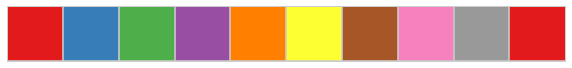

In [315]:
sns.choose_colorbrewer_palette(data_type='qual', as_cmap=False)

A better histogram: color code based on class. Visualization equivalent of groupby.

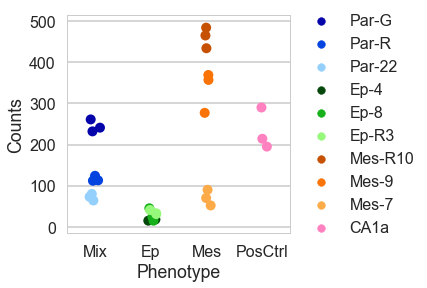

In [387]:
#palette: default: deep, muted, pastel, bright, dark, and colorblind. others: hls, 
sns.set_style("whitegrid")
sq=4
fig, ax = plt.subplots(figsize=(sq,sq))
sns.stripplot(x='Phenotype', 
                    y="Counts",
                    data=counts, 
                    hue='Label', 
                    hue_order=['Par-G', 'Par-R', 'Par-22', 
                               'Ep-4', 'Ep-8', 'Ep-R3', 
                               'Mes-R10', 'Mes-9', 'Mes-7', 
                               'CA1a'],
                    size=10,
                    jitter=True,
                    palette=sns.xkcd_palette(('royal blue',
                                            'blue',
                                            'light blue',
                                            'forest green',
                                            'green',
                                            'light green',
                                            'dark orange',
                                            'orange',
                                            'light orange',
                                             'pink'
                                            )),
                    ax=ax
                    )
leg=ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.savefig('/Volumes/Amanda4TB/gartnerlab/1heterogeneityproject/soft agar/single cell soft agar test 1 start date 20170224 and 20170228 for at 9 and at9 crystal violet staining/quantification/20170442Figure.svg',bbox_inches='tight')

In [394]:
#kind : {point, bar, count, box, violin, strip}
'''ax=sns.factorplot(x='Phenotype', 
                   y="Counts",
                   data=counts, 
                   hue='Label', 
                   kind='strip', 
                   size=6,
                   jitter=True,
                   palette="colorblind",
                   legend=False,
                   #facet_kws={'subplot_kws':{'size':25}}
                   )'''

leg

In [233]:
counts_pivoted=counts.pivot(columns="Phenotype", values='Counts')
counts_pivoted

Phenotype,Ep,Mes,Mix,PosCtrl
0,NaN,NaN,80.0,NaN
1,NaN,NaN,73.0,NaN
2,NaN,NaN,64.0,NaN
3,18.0,NaN,NaN,NaN
4,18.0,NaN,NaN,NaN
5,15.0,NaN,NaN,NaN
6,NaN,70.0,NaN,NaN
7,NaN,90.0,NaN,NaN
8,NaN,52.0,NaN,NaN
9,24.0,NaN,NaN,NaN


In [338]:
testMes=scipy.stats.ttest_ind(counts_pivoted.Mix, counts_pivoted.Mes, axis=0, equal_var=False, nan_policy='omit')
testMes

Ttest_indResult(statistic=-2.2581700590802578, pvalue=0.045105839504895023)

In [339]:
testEp=scipy.stats.ttest_ind(counts_pivoted.Mix, counts_pivoted.Ep, axis=0, equal_var=False, nan_policy='omit')
testEp

Ttest_indResult(statistic=4.4786677904836232, pvalue=0.0018576298152410185)

In [340]:
testCtrl=scipy.stats.ttest_ind(counts_pivoted.Mix, counts_pivoted.PosCtrl, axis=0, equal_var=False, nan_policy='omit')
testCtrl

Ttest_indResult(statistic=-2.2717111524672799, pvalue=0.066608460499082853)

### Styling
seaborn allows us to set a context. There are lots, but the one that good for readability is 'poster'.

In [64]:
#this holds for entire notebook
sns.set_context('poster')

We can modify the **size** and **aspect** arguments to resize our graph.

### Pairplot
seaborn contains a plot called **pairplot()** that plots the histogram of each feature along with pairwise relationships between features. very handy for when you have multiple numeric features.

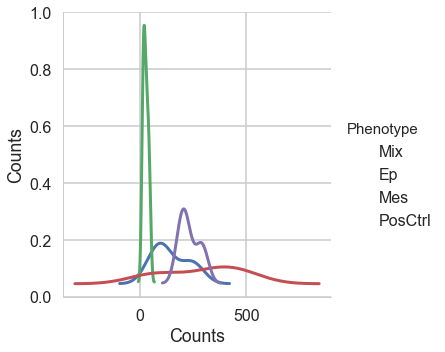

In [464]:
#g = sns.pairplot(counts, hue='Phenotype', palette='husl', markers='d', size=5, diag_kind='kde')
g = sns.PairGrid(counts, hue="Phenotype", size=5)
g = g.map_diag(sns.kdeplot, lw=3, legend=False)
g = g.add_legend()

In [474]:
Mix=counts.loc[counts['Phenotype'] == 'Mix']
Ep=counts.loc[counts['Phenotype'] == 'Ep']
Mes=counts.loc[counts['Phenotype'] == 'Mes']
PosCtrl=counts.loc[counts['Phenotype'] == 'PosCtrl']

[None, None]

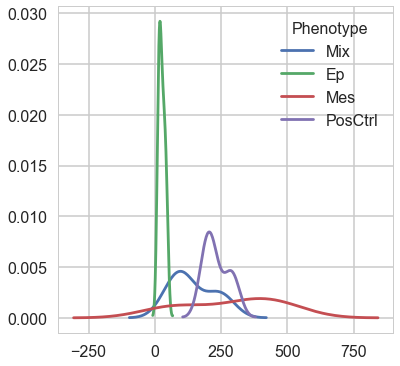

In [489]:
fig, ax = plt.subplots(figsize=(6,6))
sns.kdeplot(Mix.Counts)
sns.kdeplot(Ep.Counts)
sns.kdeplot(Mes.Counts)
sns.kdeplot(PosCtrl.Counts)
ax.legend(title="Phenotype", labels=["Mix","Ep","Mes", "PosCtrl"])
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title